## Exercise 2: inspired by: https://www.kaggle.com/sdelecourt/cnn-with-pytorch-for-mnist

The goal of this exercise is to implement and compare three different neural networks. On the contrary to the first exercise, we will use the PyTorch library to implement the networks.

### Guidelines:

This is a notebook to be *completed* and *commented*. The parts to be edited are indicated by a TO DO; the expected number of lines of code is given as an indication. The networks are already implemented, you just have to play with them. No knowledge of PyTorch is required, check the already implemented code to understand the specific functions.

### Send your work:

At the end of the session, you should individually send the completed Notebook by email at lucas.de-lara@polytechnique.edu.

In [4]:
import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

# 1) Load and treat the data

## 1.1) Load

The first value is the "label", that is, the actual digit that the handwriting is supposed to represent, such as a "7" or a "9". It is the answer to which the neural network is aspiring to classify.
The subsequent values, all comma separated, are the pixel values of the handwritten digit. The size of the pixel array is 28 by 28, so there are 784 values after the label.

In [5]:
train=np.genfromtxt('mnist_train.csv',delimiter=',')
test=np.genfromtxt('mnist_test.csv',delimiter=',')

#1.2) treat the initial data in numpy
X_train=train[1:,1:]
y_train=train[1:,0].reshape((X_train.shape[0],1)).astype(np.int)

X_test=test[1:,1:]
y_test=test[1:,0].reshape((X_test.shape[0],1)).astype(np.int)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 784)
(25000, 1)
(10000, 784)
(10000, 1)


## 1.2) Define a function to visualize an observation and use it

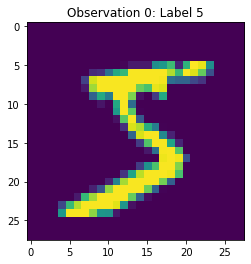

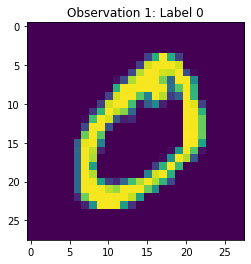

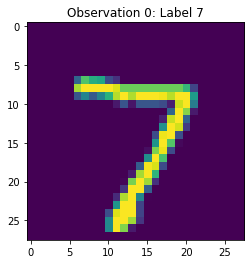

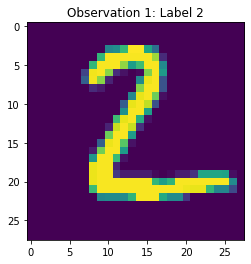

In [6]:
def ShowMNISTObservation(X_data,y_data,obsNb=0):
    plt.clf()
    plt.imshow(X_data[obsNb,:].reshape((28,28)))
    plt.title('Observation '+str(obsNb)+': Label '+str((y_data[obsNb,0])))
    plt.show()

ShowMNISTObservation(X_train,y_train,0)
ShowMNISTObservation(X_train,y_train,1)
ShowMNISTObservation(X_test,y_test,0)
ShowMNISTObservation(X_test,y_test,1)

## 1.3) Convert the numpy array as torch tensor (equivalent structures but used by pytorch)

In [7]:
torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long (i.e. 64bit)

torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

QUESTION 1: Understand well what are the data of this machine learning problem. 
            May you solve this problem using SVM, linear regression, random forests 
            or K-means?
            
Il s'agit d'un problème de classification multi-classes. On peut utiliser SVM et Random Forest - par exemple avec la bibliothèque scikit.learn, avec les options one-vs-rest ou one-vs-one, etc.
La regression linéaire n'est pas adaptée (variable catégorielle en sortie, pas continue)
Le K-means est du clustering non supervisé, pas adapté non plus.

#TO DO: write a very few lines to answer this question.

# 2) Define three classes of neural networks

In [8]:
class MLP(nn.Module):
    """
    Multi-layer perceptron adapted to the inputs images having 784 pixels
    and the output labels having 10 possible values (0,1,...,9)
    """
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(784,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,10)

    def forward(self,X):
        X = X.view(-1,784)
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)

mlp = MLP()
print(mlp)


class CNN(nn.Module):
    """
    Basic convolutional neural network
    """
    
    #Our batch shape for input x is (1, 28, 28)
    
    def __init__(self):
        super(CNN, self).__init__()
        
        #Input channels = 1, output channels = 6
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, stride=1, padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #1536 input features, 64 output features (see sizing flow below)
        self.fc1 = nn.Linear(6 * 14 * 14, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (1, 28, 28) to (6, 28, 28)
        x = F.relu(self.conv1(x))
        
        #Size changes from (6, 28, 28) to (6, 14, 14)
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (6, 14, 14) to (1, 1176)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 6 * 14 *14)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 1176) to (1, 64)
        x = F.relu(self.fc1(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        
        return(x)


cnn = CNN()
print(cnn)


class CNN2(nn.Module):
    """
    Deeper convolutional neural network than CNN
    """
    
    #Our batch shape for input x is (1, 28, 28)
    
    def __init__(self):
        super(CNN2, self).__init__()
        
        #Input channels = 1, output channels = 6
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(6, 6, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(6, 6, kernel_size=3, stride=1, padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #1536 input features, 64 output features (see sizing flow below)
        self.fc1 = nn.Linear(6 * 7 * 7, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (1, 28, 28) to (6, 28, 28)
        x = F.relu(self.conv1(x))
        
        #Size changes from (6, 28, 28) to (6, 14, 14)
        x = self.pool(x)
        
        #convolution on the 6x14x14 image
        x = F.relu(self.conv2(x))
        
        #Size changes from (6, 14, 14) to (6, 7, 7)
        x = self.pool(x)

        #convolution on the 6x7x7 image
        x = F.relu(self.conv3(x))
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (6, 7, 7) to (1, 294)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 6 * 7 *7)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 294) to (1, 64)
        x = F.relu(self.fc1(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        
        return(x)


cnn2 = CNN2()
print(cnn2)

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)
CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1176, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
CNN2(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=294, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


# 3) Function to fit the network

In [9]:
def fit(model,X_data,y_data, EPOCHS = 5, BATCH_SIZE = 32, frequencySvg=50):
    
    optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))
    error = nn.CrossEntropyLoss()
    model.train()
    
    n=X_data.shape[0]
    
    List_PrctGoodPredict=[]
    
    for epoch in range(EPOCHS):
        
        batch_start=0
        batchNb=0
        
        while batch_start+BATCH_SIZE < n:
            
            #stochastic gradient descent iteration
            var_X_batch = Variable(X_data[batch_start:batch_start+BATCH_SIZE,:].view(-1,1,28,28)).float()
            var_y_batch = Variable(y_data[batch_start:batch_start+BATCH_SIZE,0])
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()
            
            #update the first observation of the batch
            batch_start+=BATCH_SIZE
            batchNb+=1
            
            # Total correct predictions
            predicted = torch.max(output.data, 1)[1]
            
            PrctGoodPredict = (100./BATCH_SIZE)*float((predicted == var_y_batch.view(-1)).sum())

            if batchNb%frequencySvg==0:
                print("epoch="+str(epoch)+" -- batch start="+str(batch_start)+" -> Prct good predictions="+str(PrctGoodPredict))
                
            List_PrctGoodPredict.append(PrctGoodPredict)
    
    return List_PrctGoodPredict

# 4) Train the networks

In [10]:
print("MLP Train")
mlp = MLP()
List_PrctGoodPredict_MLP=fit(mlp,torch_X_train,torch_y_train,EPOCHS=2,BATCH_SIZE = 100)

print("MLP CNN")
cnn = CNN()
List_PrctGoodPredict_CNN=fit(cnn,torch_X_train,torch_y_train,EPOCHS=2,BATCH_SIZE = 100)

print("MLP CNN2")
cnn2 = CNN2()
List_PrctGoodPredict_CNN2=fit(cnn2,torch_X_train,torch_y_train,EPOCHS=2,BATCH_SIZE = 100)

MLP Train
epoch=0 -- batch start=5000 -> Prct good predictions=90.0
epoch=0 -- batch start=10000 -> Prct good predictions=90.0
epoch=0 -- batch start=15000 -> Prct good predictions=94.0
epoch=0 -- batch start=20000 -> Prct good predictions=96.0
epoch=1 -- batch start=5000 -> Prct good predictions=97.0
epoch=1 -- batch start=10000 -> Prct good predictions=96.0
epoch=1 -- batch start=15000 -> Prct good predictions=96.0
epoch=1 -- batch start=20000 -> Prct good predictions=98.0
MLP CNN
epoch=0 -- batch start=5000 -> Prct good predictions=92.0
epoch=0 -- batch start=10000 -> Prct good predictions=93.0
epoch=0 -- batch start=15000 -> Prct good predictions=90.0
epoch=0 -- batch start=20000 -> Prct good predictions=95.0
epoch=1 -- batch start=5000 -> Prct good predictions=94.0
epoch=1 -- batch start=10000 -> Prct good predictions=100.0
epoch=1 -- batch start=15000 -> Prct good predictions=98.0
epoch=1 -- batch start=20000 -> Prct good predictions=98.0
MLP CNN2
epoch=0 -- batch start=5000 -> P

# 5) Check the results

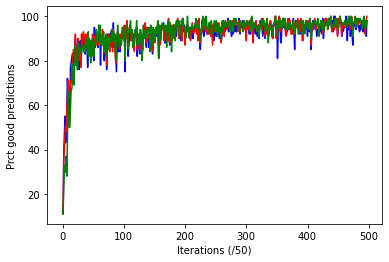

In [11]:
plt.plot(List_PrctGoodPredict_MLP,'b')
plt.plot(List_PrctGoodPredict_CNN,'r')
plt.plot(List_PrctGoodPredict_CNN2,'g')
plt.xlabel('Iterations (/50)')
plt.ylabel('Prct good predictions')
plt.show()

QUESTION 2: Fully understand and play the code. What is the main difference between
            the structure of the three networks. Does it seem to have an impact on
            the results?
            
MLP est un 'multi-layer perceptron' avec 3 layers denses qui amènent à une fonction softmax en sortie.

CNN est un premier réseau convolutionnel, avec une layer de conv2D en entrée : 6 kernels 3x3 balayent l'image en entrée et convoluent. Il y a ensuite une layer de maxpooling qui réduit la taille de l'image par quatre, puis deux layers denses et la sortie softmax.

CNN2, par rapport à CNN, a trois layers de convolution en premières couches, puis un maxpooling et deux layers denses et la sortie softmax. L'idée des convolution successives est de 'capturer' des patterns dans l'image, spécifiques à chaque classe, pour permttre au softmax de classifier avec une meilleure performance.

#TO DO: write a few lines to comment on the structure of the three networks.

In [12]:
print("Performance MLP sur le training set = ", max(List_PrctGoodPredict_MLP),"%")
print("Performance CNN sur le training set = ", max(List_PrctGoodPredict_CNN),"%")
print("Performance CNN2 sur le training set = ", max(List_PrctGoodPredict_CNN2),'%')

Performance MLP sur le training set =  100.0 %
Performance CNN sur le training set =  100.0 %
Performance CNN2 sur le training set =  100.0 %


#TO DO: write a few lines to comment on the result.

100% sur un training set dénote la plupart du temps un overfitting prononcé.
Il faut absolument mesurer la capacité à généraliser sur le test set.

QUESTION 3: Measure the percentages of good predictions on the test set. Which network
            has the best generalization properties here?

In [13]:
#TO DO: compute the percentages for the three networks and print them.
#You can get inspiration from the fit function. (15 lines expected)

In [14]:
torch_X_test.shape

torch.Size([10000, 784])

In [15]:
models = [mlp, cnn,cnn2]
noms = ['MLP','CNN','CNN2']
List_PrctGoodPredict=[]

for nom,model in zip(noms,models):
    
    good_X_test = Variable(torch_X_test.view(-1,1,28,28)).float()
    y_pred = model(good_X_test)
    
    predicted = torch.max(y_pred.data, 1)[1]
    PrctGoodPredict = (100./torch_X_test.shape[0])*float((predicted == torch_y_test.view(-1)).sum())
    
    print("Performance du ",nom,"sur le test set = ",PrctGoodPredict," %") 

Performance du  MLP sur le test set =  93.61  %
Performance du  CNN sur le test set =  95.81  %
Performance du  CNN2 sur le test set =  96.86  %


#TO DO: write a few lines to comment on the results.

Les résultats de généralisation sont bons ! Le CNN2 performe à ~97% d'accuracy.

QUESTION 4: Run the code on the 'mnist_train_100.csv' dataset, which has only
           100 observations instead of 60000! Do you manage to have good results
            on the test set?

In [19]:
#load data
train=np.genfromtxt('./mnist_train_100.csv',delimiter=',')

X_train_short=train[1:,1:]
y_train_short=train[1:,0].reshape((X_train_short.shape[0],1)).astype(np.int)

torch_X_train_short = torch.from_numpy(X_train_short).type(torch.LongTensor)
torch_y_train_short = torch.from_numpy(y_train_short).type(torch.LongTensor) # data type is long (i.e. 64bit)

mlp_short = MLP()
cnn_short = CNN()
cnn2_short = CNN2()

models = [mlp_short, cnn_short, cnn2_short]
noms = ['MLP','CNN','CNN2']
good_X_test = Variable(torch_X_test.view(-1,1,28,28)).float()

BATCH_SIZE = 5

for nom, model in zip(noms, models):
    
    print ("")
    print ("----- modèle : ", nom, "---------")
    print ("training")
    List_PrctGoodPredict=fit(model,torch_X_train_short,torch_y_train_short,EPOCHS=100,BATCH_SIZE = 5)
    print ("performance sur training set = ",max(List_PrctGoodPredict)," %")
    
    print ("----- test set -------")
    y_pred = model(good_X_test)
    predicted = torch.max(y_pred.data, 1)[1]
    PrctGoodPredict = (100./torch_X_test.shape[0])*float((predicted == torch_y_test.view(-1)).sum())
    print("Performance du ",nom,"sur le test set = ",PrctGoodPredict," %")


----- modèle :  MLP ---------
training
performance sur training set =  100.0  %
----- test set -------
Performance du  MLP sur le test set =  64.36  %

----- modèle :  CNN ---------
training
performance sur training set =  100.0  %
----- test set -------
Performance du  CNN sur le test set =  64.66  %

----- modèle :  CNN2 ---------
training
performance sur training set =  100.0  %
----- test set -------
Performance du  CNN2 sur le test set =  67.03  %


#TO DO: comment on the results.

Les réseaux overfittent clairement sur le petit training set ; la généralisation est mauvaise

QUESTION 5: Adapt the MLP network to the IRIS dataset. Can you have better results 
            than by using a linear SVM classifier?

In [33]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn import svm
clf = svm.SVC()

print('X shape: '+str(X.shape))
print('y shape: '+str(y.shape))

X shape: (150, 4)
y shape: (150,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [35]:
torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long (i.e. 64bit)

torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

In [36]:
class MLP2(nn.Module):
    
    # Adaptation au IRIS data set : 150 observations de taille 4 x 1 chacune
    # et 3 labels possibles

    def __init__(self):
        super(MLP2, self).__init__()
        self.linear1 = nn.Linear(4,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,3)

    def forward(self,X):
        X = X.view(-1,4)
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)

In [58]:
def fit2(model,X_data,y_data, EPOCHS = 5, BATCH_SIZE = 32, frequencySvg=1):
    
    optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))
    error = nn.CrossEntropyLoss()
    model.train()
    
    n=X_data.shape[0]
    
    List_PrctGoodPredict=[]
    
    for epoch in range(EPOCHS):
        
        batch_start=0
        batchNb=0
        
        while batch_start+BATCH_SIZE < n:
            
            #stochastic gradient descent iteration
            var_X_batch = Variable(X_data[batch_start:batch_start+BATCH_SIZE,:]).view(-1,1,4,1).float()
            var_y_batch = Variable(y_data[batch_start:batch_start+BATCH_SIZE])
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()
            
            #update the first observation of the batch
            batch_start+=BATCH_SIZE
            batchNb+=1
            
            # Total correct predictions
            predicted = torch.max(output.data, 1)[1]
            
            PrctGoodPredict = (100./BATCH_SIZE)*float((predicted == var_y_batch.view(-1)).sum())

            if batchNb%frequencySvg==0:
                print("epoch="+str(epoch)+" -- batch start="+str(batch_start)+" -> Prct good predictions="+str(PrctGoodPredict))
                
            List_PrctGoodPredict.append(PrctGoodPredict)
    
    return List_PrctGoodPredict

In [61]:
print("MLP Train for IRIS")
mlp_iris = MLP2()
List_PrctGoodPredict_MLP=fit2(mlp_iris,torch_X_train,torch_y_train,EPOCHS=5,BATCH_SIZE = 10 )
print ("performance finale sur training set = ",max(List_PrctGoodPredict)," %")

MLP Train for IRIS
epoch=0 -- batch start=10 -> Prct good predictions=10.0
epoch=0 -- batch start=20 -> Prct good predictions=60.0
epoch=0 -- batch start=30 -> Prct good predictions=60.0
epoch=0 -- batch start=40 -> Prct good predictions=80.0
epoch=0 -- batch start=50 -> Prct good predictions=60.0
epoch=0 -- batch start=60 -> Prct good predictions=80.0
epoch=0 -- batch start=70 -> Prct good predictions=50.0
epoch=0 -- batch start=80 -> Prct good predictions=70.0
epoch=0 -- batch start=90 -> Prct good predictions=60.0
epoch=0 -- batch start=100 -> Prct good predictions=60.0
epoch=0 -- batch start=110 -> Prct good predictions=80.0
epoch=1 -- batch start=10 -> Prct good predictions=80.0
epoch=1 -- batch start=20 -> Prct good predictions=60.0
epoch=1 -- batch start=30 -> Prct good predictions=60.0
epoch=1 -- batch start=40 -> Prct good predictions=70.0
epoch=1 -- batch start=50 -> Prct good predictions=60.0
epoch=1 -- batch start=60 -> Prct good predictions=70.0
epoch=1 -- batch start=70 -

In [62]:
List_PrctGoodPredict=[]

good_X_test = Variable(torch_X_test.view(-1,1,4,1)).float()
y_pred = mlp_iris(good_X_test)
    
predicted = torch.max(y_pred.data, 1)[1]
PrctGoodPredict = (100./torch_X_test.shape[0])*float((predicted == torch_y_test.view(-1)).sum())
    
print("Performance du MLP2 sur le test set IRIS = ",PrctGoodPredict," %") 

Performance du MLP2 sur le test set IRIS =  93.33333333333334  %


#### Performance du MLP2 sur le IRIS data set : 93%

Il faut garder en mémoire que le training set à 120 observations, et le test set 30 observations.
Le réseau MLP2 est assez lourd (taille des layers), ce qui semble expliquer à la fois l'overfitting sur le training set, mais malgré tout une bonne performance en généralisation

### Regression multi-classe avec SVM

In [77]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import time
import pandas as pd

In [78]:
norm = preprocessing.Normalizer()   # Normalisation
core = SVC(C = 1.0, # coeff régularisation L2
           kernel = 'rbf', # Gaussian Kernel, classique, 
           # https://en.wikipedia.org/wiki/Radial_basis_function_kernel
           gamma = 'scale', # choix paramètre du Gaussian Kernel
           tol = 0.1,  # tolérance basse pour ne pas trop attendre
           class_weight = 'balanced',  # permet d'affecter des poids en fonction de la fréquence des classes.
           max_iter = 1000,   # on augmente le nombre d'itérations pour avoir la convergence
           decision_function_shape = 'ovr', # one-versus-rest classifiers en multi-classes
           verbose = True
           )

liste_composants = [('Normalisation', norm),
                    ('Coeur', core)]

modele_svm = Pipeline(liste_composants)

In [89]:
modele_svm = modele_svm.fit(X_train, y_train)

y_pred = modele_svm.predict(X_test)

print ("Accuracy = ",  modele_svm.score(X_test, y_pred))

[LibSVM]Accuracy =  1.0


100% accuracy pour le SVM avec Kernel Gaussien : à vérifier, cela semble haut...

In [86]:
y_pred.shape

(30,)

In [87]:
y_test.shape

(30,)

#TO DO: comment on the results.

QUESTION 6: TO ADDRESS ONLY IF ALL THE PREVIOUS QUESTIONS HAVE BEEN ANSWERED.

Study the influence of the EPOCHS and the BATCH_SIZE parameters on the predictions of the neural networks. You may plot your results as functions of EPOCHS and BATCH_SIZE.

In [ ]:
#TO DO...